**Market segmentation**
Consider the data in social_marketing.csv. This was data collected in the course of a market-research study using followers of the Twitter account of a large consumer brand that shall remain nameless---let's call it "NutrientH20" just to have a label. The goal here was for NutrientH20 to understand its social-media audience a little bit better, so that it could hone its messaging a little more sharply.

A bit of background on the data collection: the advertising firm who runs NutrientH20's online-advertising campaigns took a sample of the brand's Twitter followers. They collected every Twitter post ("tweet") by each of those followers over a seven-day period in June 2014. Every post was examined by a human annotator contracted through Amazon's Mechanical Turk service. Each tweet was categorized based on its content using a pre-specified scheme of 36 different categories, each representing a broad area of interest (e.g. politics, sports, family, etc.) Annotators were allowed to classify a post as belonging to more than one category. For example, a hypothetical post such as "I'm really excited to see grandpa go wreck shop in his geriatic soccer league this Sunday!" might be categorized as both "family" and "sports." You get the picture.

Each row of social_marketing.csv represents one user, labeled by a random (anonymous, unique) 9-digit alphanumeric code. Each column represents an interest, which are labeled along the top of the data file. The entries are the number of posts by a given user that fell into the given category. Two interests of note here are "spam" (i.e. unsolicited advertising) and "adult" (posts that are pornographic, salacious, or explicitly sexual). There are a lot of spam and pornography "bots" on Twitter; while these have been filtered out of the data set to some extent, there will certainly be some that slip through. There's also an "uncategorized" label. Annotators were told to use this sparingly, but it's there to capture posts that don't fit at all into any of the listed interest categories. (A lot of annotators may used the "chatter" category for this as well.) Keep in mind as you examine the data that you cannot expect perfect annotations of all posts. Some annotators might have simply been asleep at the wheel some, or even all, of the time! Thus there is some inevitable error and noisiness in the annotation process.

Your task to is analyze this data as you see fit, and to prepare a concise report for NutrientH20 that identifies any interesting market segments that appear to stand out in their social-media audience. You have complete freedom in deciding how to pre-process the data and how to define "market segment." (Is it a group of correlated interests? A cluster? A latent factor? Etc.) Just use the data to come up with some interesting, well-supported insights about the audience, and be clear about what you did.


****


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

import numpy as np

marketSegmentation = pd.read_csv("/Users/brindaasuri/Desktop/MSBA/Data Science Programming/social_marketing.csv")
marketSegmentation.head()

,Unnamed: 0,chatter,current_events,travel,photo_sharing,uncategorized,tv_film,sports_fandom,politics,food,...,religion,beauty,parenting,dating,school,personal_fitness,fashion,small_business,spam,adult
0,hmjoe4g3k,2,0,2,2,2,1,1,0,4,...,1,0,1,1,0,11,0,0,0,0
1,clk1m5w8s,3,3,2,1,1,1,4,1,2,...,0,0,0,1,4,0,0,0,0,0
2,jcsovtak3,6,3,4,3,1,5,0,2,1,...,0,1,0,1,0,0,1,0,0,0
3,3oeb4hiln,1,5,2,2,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,fd75x1vgk,5,2,0,6,1,0,0,2,0,...,0,0,0,0,0,0,0,1,0,0


In [4]:
marketSegmentation = marketSegmentation[
    (marketSegmentation['spam'] == 0) & 
    (marketSegmentation['chatter'] < 
     (1.5 * (marketSegmentation['chatter'].quantile(0.75) - marketSegmentation['chatter'].quantile(0.25)) + 
      marketSegmentation['chatter'].quantile(0.75))) #removed craxy outliers above the 75th percentile
]

#drop spam column
marketSegmentation = marketSegmentation.drop(columns=['spam'])

In [5]:
marketSegmentation_scale = marketSegmentation.drop(columns=['Unnamed: 0'])  
scaler = StandardScaler()
marketSegmentation_scaled = scaler.fit_transform(marketSegmentation_scale)

In [6]:
#Use PCA to help with scaling the data

In [8]:
pca = PCA()
pca_marketSegmentation_result = pca.fit(marketSegmentation_scaled)

#variance
variance = pca.explained_variance_

#percentage of variance
percentage_variance = variance / np.sum(variance) * 100

#cumulative percentage of variance
cumulative_percentage_variance = np.cumsum(percentage_variance)

#convert to a pandas Series
cumulative_percentage_variance = pd.Series(cumulative_percentage_variance)

#cumulative percentage of variance explained
print(cumulative_percentage_variance)

0      12.707433
1      20.973339
2      28.261680
3      34.991610
4      41.216966
5      46.253413
6      50.987439
7      55.080470
8      58.346320
9      61.354657
10     64.250429
11     66.946527
12     69.603978
13     72.170599
14     74.659452
15     77.064312
16     79.367631
17     81.440470
18     83.293297
19     84.896915
20     86.299873
21     87.652542
22     88.986637
23     90.192166
24     91.382478
25     92.552964
26     93.703353
27     94.768485
28     95.785225
29     96.779980
30     97.640867
31     98.308351
32     98.950648
33     99.497159
34    100.000000
dtype: float64


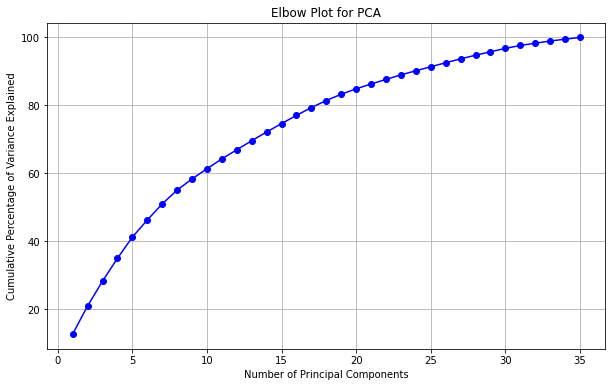

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_percentage_variance) + 1), cumulative_percentage_variance, marker='o', linestyle='-', color='b')

plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Percentage of Variance Explained')
plt.grid(True)
plt.show()

In [16]:
var_95 = cumulative_percentage_variance < 95

#occurrences of True and False
#count_95 = var_95.value_counts()

# Display the result
print(var_95)

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28    False
29    False
30    False
31    False
32    False
33    False
34    False
dtype: bool


**Using T-SNE to Assess Market Segmentation***

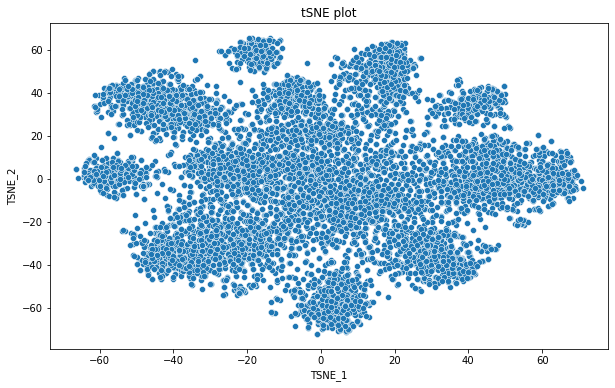

In [11]:
#t-SNE
from sklearn.manifold import TSNE

#pca_marketSegmentation = pca_marketSegmentation_result.components_.T[:, 0:28]
pca_marketSegmentation = pca_marketSegmentation_result.transform(marketSegmentation_scaled)[:, :28]


#perform t-SNE on the selected principal components
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(pca_marketSegmentation)

tsne_data = pd.DataFrame({
    'X': marketSegmentation['Unnamed: 0'].iloc[:len(pca_marketSegmentation)],
    'TSNE_1': tsne_result[:, 0],
    'TSNE_2': tsne_result[:, 1]
})

plt.figure(figsize=(10, 6))
sns.scatterplot(x='TSNE_1', y='TSNE_2', data=tsne_data)

plt.title('tSNE plot')
plt.xlabel('TSNE_1')
plt.ylabel('TSNE_2')
plt.show()


     k           wss
0    1  1.456590e+07
1    2  9.273347e+06
2    3  5.743157e+06
3    4  4.235340e+06
4    5  3.323221e+06
5    6  2.527352e+06
6    7  2.195411e+06
7    8  1.887676e+06
8    9  1.604071e+06
9   10  1.387444e+06
10  11  1.222503e+06
11  12  1.086798e+06
12  13  9.819422e+05
13  14  8.960469e+05
14  15  8.292736e+05


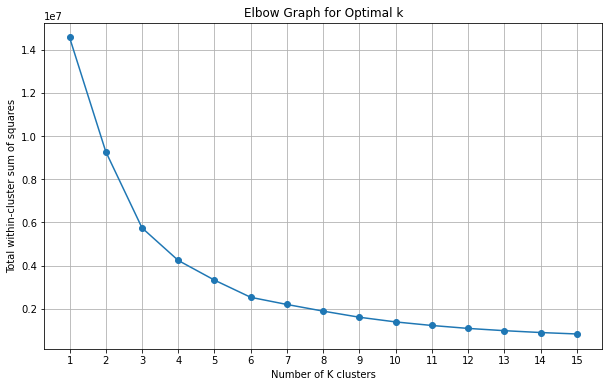

In [12]:
#within cluster sum of squres list
wss = []

#wss for k values from 1 to 15
for k in range(1, 16):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tsne_data[['TSNE_1', 'TSNE_2']])
    wss.append(kmeans.inertia_)  #inertia_ is the total within-cluster sum of squares

#create a DataFrame for plotting
elbow_data = pd.DataFrame({'k': range(1, 16), 'wss': wss})

print(elbow_data)

#plot the elbow method results
plt.figure(figsize=(10, 6))
plt.plot(elbow_data['k'], elbow_data['wss'], marker='o')
plt.title("Elbow Graph for Optimal k")
plt.xlabel("Number of K clusters")
plt.ylabel("Total within-cluster sum of squares")
plt.xticks(range(1, 16))
plt.grid(True)
plt.show()

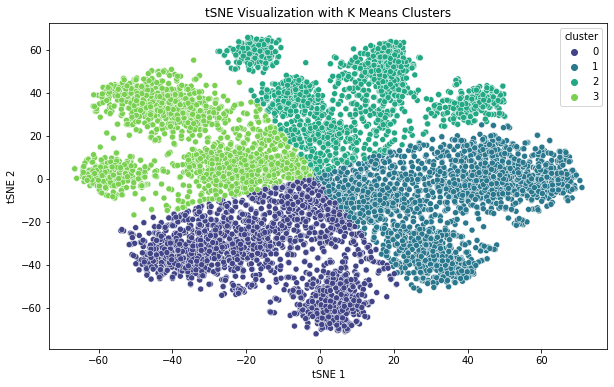

In [13]:
optimalK = 4

#kmeans clustering
kmeans_tsne_result = KMeans(n_clusters=optimalK, n_init=20)
tsne_data['cluster'] = kmeans_tsne_result.fit_predict(tsne_data[['TSNE_1', 'TSNE_2']])

#need to convert to a categorical type
tsne_data['cluster'] = tsne_data['cluster'].astype('category')

#visualize the t-SNE results with clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TSNE_1', y='TSNE_2', hue='cluster', palette='viridis', data=tsne_data)

#add title and labels
plt.title("tSNE Visualization with K Means Clusters")
plt.xlabel("tSNE 1")
plt.ylabel("tSNE 2")


plt.show()

In [14]:
marketSegmentation_clustered = pd.merge(marketSegmentation, 
                                         tsne_data[['X', 'cluster']], 
                                         left_on='Unnamed: 0', 
                                         right_on='X')

In [15]:
cluster_profiles = marketSegmentation_clustered.drop(columns=['Unnamed: 0']).groupby('cluster').median(numeric_only=True).reset_index()
cluster_profiles

,cluster,chatter,current_events,travel,photo_sharing,uncategorized,tv_film,sports_fandom,politics,food,...,art,religion,beauty,parenting,dating,school,personal_fitness,fashion,small_business,adult
0,0,3,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,2,0,0,0
1,1,3,1,1,1,0,0,2,1,1,...,0,1,0,1,0,1,0,0,0,0
2,2,3,1,1,2,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,3,5,2,1,4,1,1,1,1,1,...,0,0,1,0,0,0,0,1,0,0


To assess market segmentation, we first dropped any columns that could affect the data and normalized our set, since the data account for various different categories. For example, we filtered out any non-zero values in the spam column and then we dropped the spam column, and removed chatter outliers by segmenting by percentile. We also scaled the data to standardize each feature. This would make our PCA results more accurate. We used PCA to find any components that account for more variance in the data. From our plot we could see that the first 10 principal components account for a lot of variance and then the line steepness dimishes off, meaning that adding more components will not significantly increase any explained variance. We can also see that in this plot, reducing the number of variables to about 15-20 component, can be a good balance for identifying distinct market segments. By forcusing n this number of variables, NutrientH20 would be able to understand where to allocate their interests more efficiently. 
To look more closely at market segmentation, we used T-SNE to identify market clusters and see if there are any natural distinct segemnts within the data. We can see from the plot that although there natural groupings, the clusters are overlapping a bit. This indicates that the market segments share some common charasteristics. To better visualize this idea, we performed k-means clustering. From the k-means plot we can see that the segements do well at falling into 4 main categories. NutrientH20 can now easilly use these segments to develop specific content or promotion tactics. 